ANALISIS DE RESULTADOS 

In [3]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("resultados_text_analytics.xlsx")

df.head()


,Archivo,Idioma,Sentimiento,Key_Phrases,Entities,Links
0,review68.txt,Spanish,positive,"comunicación, Buena transparencia, email, paso...",NaN,Los Angeles (https://en.wikipedia.org/wiki/Los...
1,review33.txt,Spanish,negative,"documentación, 15 días, desembolso, tiempo, ur...","15 días (DateTime), urgencia (Event)",United Nations (https://en.wikipedia.org/wiki/...
2,review58.txt,Spanish,positive,"Cero seguimiento, préstamo, banco",banco (Location),Computer Entertainment Rating Organization (ht...
3,review80.txt,Spanish,positive,"pequeño error, Excelente gestión, documento, a...","asesor (PersonType), gestión (Skill)","HUBO (https://en.wikipedia.org/wiki/HUBO), Dob..."
4,review30.txt,Spanish,negative,"tres semanas, error interno, solicitud, altern...","tres semanas (DateTime), solicitud (Skill)",NaN


REVISION RESUMEN SENTIMIENTOS

Sentimiento
negative    41
positive    25
mixed       11
neutral      3
Name: count, dtype: int64


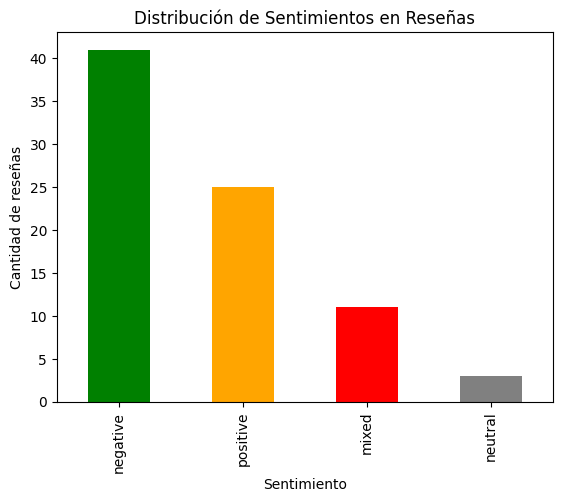

In [15]:

conteo_sentimientos = df['Sentimiento'].value_counts()

print(conteo_sentimientos)

conteo_sentimientos.plot(kind='bar', color=['green', 'orange', 'red', 'gray'])
plt.title("Distribución de Sentimientos en Reseñas")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de reseñas")
plt.show()


PALABRAS CLAVES MAS FRECUENTES

In [16]:
from collections import Counter
import itertools


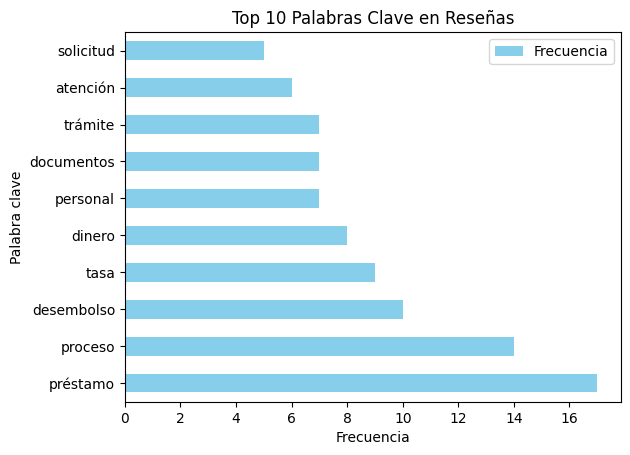

In [17]:
todas = list(itertools.chain.from_iterable([str(k).split(', ') for k in df['Key_Phrases']]))

palabras_frecuentes = Counter(todas).most_common(10)

df_palabras = pd.DataFrame(palabras_frecuentes, columns=['Palabra', 'Frecuencia'])

df_palabras.plot(kind='barh', x='Palabra', y='Frecuencia', color='skyblue')
plt.title("Top 10 Palabras Clave en Reseñas")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra clave")
plt.show()


PALABRAS CLAVE POR SENTIMIENTO (positivos vs ngeativos)

In [18]:
from collections import Counter
import itertools
import pandas as pd

In [19]:
from collections import Counter
import itertools
import pandas as pd

def top_phrases_por_sentimiento(df, senti='negative', k=15):
    frases = (
        df.loc[df['Sentimiento'].str.lower() == senti, 'Key_Phrases']
          .dropna()
          .map(lambda x: [p.strip() for p in str(x).split(',') if p.strip()])
    )
    todas = list(itertools.chain.from_iterable(frases))
    return pd.DataFrame(Counter(todas).most_common(k), columns=['frase', 'freq'])

# 🔹 Ejecutar para los 4 tipos de sentimiento
top_neg = top_phrases_por_sentimiento(df, 'negative', 15)
top_pos = top_phrases_por_sentimiento(df, 'positive', 15)
top_mix = top_phrases_por_sentimiento(df, 'mixed', 15)
top_neu = top_phrases_por_sentimiento(df, 'neutral', 15)

# 🔹 Mostrar resultados
print("🔴 TOP PALABRAS EN RESEÑAS NEGATIVAS")
display(top_neg.head(15))

print("🟢 TOP PALABRAS EN RESEÑAS POSITIVAS")
display(top_pos.head(15))

print("🟠 TOP PALABRAS EN RESEÑAS MIXTAS")
display(top_mix.head(15))

print("⚪ TOP PALABRAS EN RESEÑAS NEUTRAS")
display(top_neu.head(15))



🔴 TOP PALABRAS EN RESEÑAS NEGATIVAS


,frase,freq
0,proceso,6
1,desembolso,4
2,préstamo,4
3,documentos,4
4,tasa,4
5,tiempo,3
6,dinero,3
7,atención,3
8,trámites,3
9,papeleo,3


🟢 TOP PALABRAS EN RESEÑAS POSITIVAS


,frase,freq
0,préstamo,10
1,proceso,6
2,tasa,5
3,Caja ADV,4
4,dos días,3
5,dinero,3
6,personal,3
7,solicitud,3
8,tres días,3
9,paso,2


🟠 TOP PALABRAS EN RESEÑAS MIXTAS


,frase,freq
0,préstamo,3
1,documentos,3
2,desembolso,3
3,atención,2
4,tasas,2
5,varios documentos,2
6,proceso,2
7,personal,2
8,trámite,2
9,dinero,2


⚪ TOP PALABRAS EN RESEÑAS NEUTRAS


,frase,freq
0,atención personalizada,1
1,desembolso,1
2,ejecutiva,1
3,sitio web,1
4,archivos,1
5,grandes,1
6,estabilidad,1
7,aplicación,1
8,trámite,1
9,seguimiento,1


LIMPIEZA Y PREPARACION DE HELPERS

In [20]:
import re, unicodedata
from collections import Counter, defaultdict
import numpy as np

In [21]:
# 🔹 Función para limpiar texto
def norm(s):
    s = str(s or "")
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode()  # Quita tildes
    s = re.sub(r"[^a-zA-Z0-9áéíóúüñ\s,]", "", s)  # Elimina símbolos raros
    return s.lower().strip()

# 🔹 Normalización de columnas
df["Sentimiento"] = df["Sentimiento"].fillna("neutral").str.lower().str.strip()
df["Key_Phrases_norm"] = df["Key_Phrases"].fillna("").apply(norm)
df["Entities_norm"] = df["Entities"].fillna("").apply(norm)

# 🔹 Confirmar columnas limpias
print("Columnas listas para análisis:")
print(df[["Sentimiento", "Key_Phrases_norm", "Entities_norm"]].head())



Columnas listas para análisis:
  Sentimiento                                   Key_Phrases_norm  \
0    positive  comunicacion, buena transparencia, email, paso...   
1    negative  documentacion, 15 dias, desembolso, tiempo, ur...   
2    positive                  cero seguimiento, prestamo, banco   
3    positive  pequeno error, excelente gestion, documento, a...   
4    negative  tres semanas, error interno, solicitud, altern...   

                            Entities_norm  
0                                          
1        15 dias datetime, urgencia event  
2                          banco location  
3        asesor persontype, gestion skill  
4  tres semanas datetime, solicitud skill  


Co-ocurrencias de frases clave por sentimiento (heatmap TOP términos vs sentimiento)

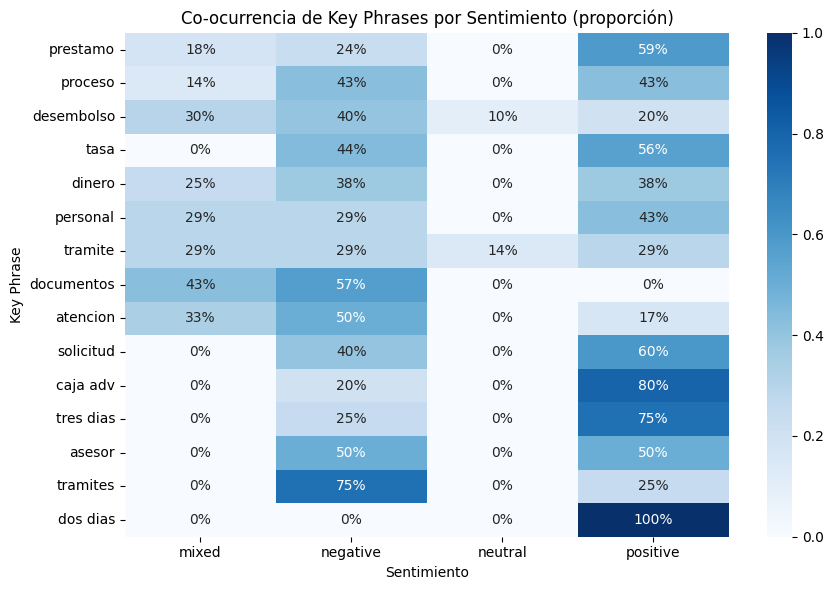

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

rows = []
for _, r in df.iterrows():
    for kp in [k for k in r["Key_Phrases_norm"].split(", ") if k]:
        rows.append((kp, r["Sentimiento"]))
cooc = pd.DataFrame(rows, columns=["kp", "sent"])

top_kp = cooc["kp"].value_counts().head(15).index
subset = cooc[cooc["kp"].isin(top_kp)]

pivot = pd.crosstab(subset["kp"], subset["sent"]).reindex(index=top_kp)
pivot = pivot.div(pivot.sum(axis=1), axis=0)  # proporciones por frase

plt.figure(figsize=(9,6))
sns.heatmap(pivot, annot=True, fmt=".0%", cmap="Blues")
plt.title("Co-ocurrencia de Key Phrases por Sentimiento (proporción)")
plt.xlabel("Sentimiento")
plt.ylabel("Key Phrase")
plt.tight_layout()
plt.show()



OBSERVACIONES:

- La mayoría de las palabras asociadas a procesos rápidos como “dos días”, “tasa” o “caja ADV” se concentran en reseñas positivas, lo que sugiere que los clientes valoran principalmente la agilidad y claridad del servicio.

- Los términos como “documentos”, “atención” o “trámite” aparecen con mayor peso en reseñas negativas o mixtas, lo que indica que los retrasos o errores en los procesos administrativos son los factores que más afectan la satisfacción del cliente.

Extracción de tiempos de proceso (días/horas) desde entidades y relación con sentimiento

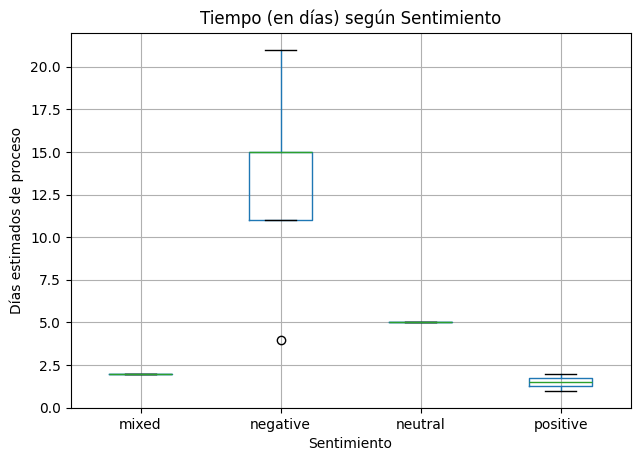

Promedios por sentimiento (días):
Sentimiento
mixed        2.0
negative    13.2
neutral      5.0
positive     1.5
Name: tiempo_dias, dtype: float64


In [23]:
def parse_tiempo(s):
    s = s or ""
    dias   = [int(x) for x in re.findall(r"(\d+)\s*d[ií]as?", s)]
    horas  = [int(x) for x in re.findall(r"(\d+)\s*horas?", s)]
    sem    = [int(x) for x in re.findall(r"(\d+)\s*seman", s)]
    vals_dias  = dias
    vals_dias += [h/24 for h in horas]
    vals_dias += [w*7 for w in sem]
    return np.median(vals_dias) if vals_dias else np.nan

df["tiempo_dias"] = df["Entities_norm"].apply(parse_tiempo)

ax = df.boxplot(column="tiempo_dias", by="Sentimiento", figsize=(7,5))
plt.title("Tiempo (en días) según Sentimiento")
plt.suptitle("")
plt.xlabel("Sentimiento")
plt.ylabel("Días estimados de proceso")
plt.show()

print("Promedios por sentimiento (días):")
print(df.groupby("Sentimiento")["tiempo_dias"].mean().round(2))


OBSERVACIONES:

- Las reseñas con sentimiento positivo están asociadas a procesos rápidos, con un promedio de solo 1.5 días, lo que indica que la rapidez en la atenciOn tiene un impacto directo en la satisfacción del cliente.

- En cambio, las reseñas negativas muestran un promedio mucho mayor (13 días), lo que sugiere que los tiempos de espera largos o retrasos son la principal causa de insatisfacción entre los usuarios.

Temas de negocio (rapidez, trato, requisitos, comunicación, errores) con uplift negativo/positivo

<Figure size 900x600 with 0 Axes>

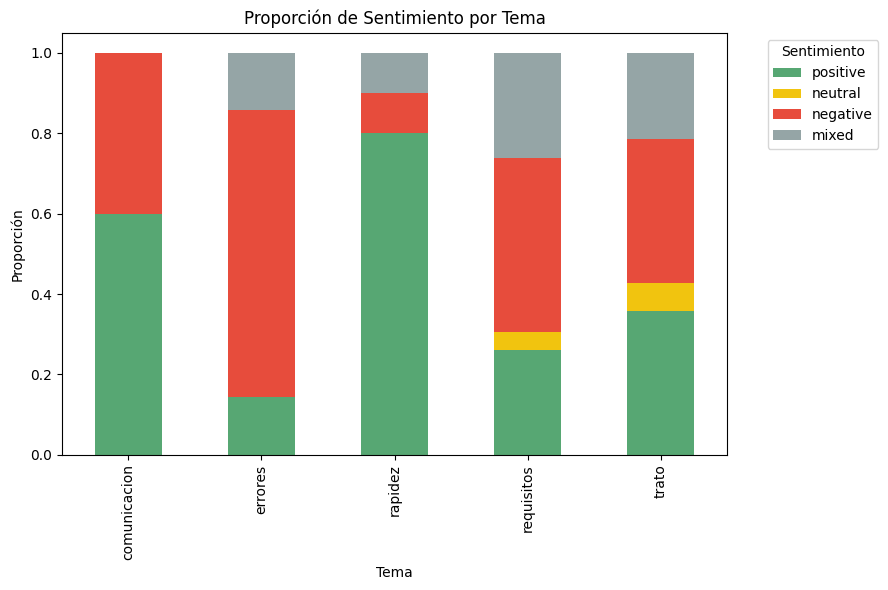

Uplift de sentimiento negativo por tema (↑ = peor que el promedio):


temas
errores         0.20
requisitos     -0.08
comunicacion   -0.11
trato          -0.16
rapidez        -0.41
Name: neg_rate, dtype: float64


📉 El tema con mayor impacto negativo es 'errores', con un uplift de 20.2% sobre el promedio de negatividad global.


In [24]:
temas = {
    "rapidez":      ["rapido", "48 horas", "24 horas", "dos dias", "tres dias", "agil"],
    "requisitos":   ["documento", "requisito", "burocrat", "tramite", "firma", "formulari"],
    "comunicacion": ["comunicacion", "correo", "whatsapp", "informaron", "respuesta"],
    "trato":        ["trato", "amable", "empatico", "respeto", "atencion"],
    "errores":      ["error", "observacion", "coordinacion", "cancelaron"]
}

def tag_temas(texto):
    hits = set()
    for t, kws in temas.items():
        if any(k in texto for k in kws):
            hits.add(t)
    return list(hits)

df["temas"] = df["Key_Phrases_norm"].apply(tag_temas)

df_t = df.explode("temas").dropna(subset=["temas"])

dist = pd.crosstab(df_t["temas"], df_t["Sentimiento"])
dist_prop = dist.div(dist.sum(axis=1), axis=0)

cols = [c for c in ["positive","neutral","negative","mixed"] if c in dist_prop.columns]

plt.figure(figsize=(9,6))
dist_prop[cols].plot(kind="bar", stacked=True, figsize=(9,6), color=["#57A773","#F1C40F","#E74C3C","#95A5A6"])
plt.title("Proporción de Sentimiento por Tema")
plt.ylabel("Proporción")
plt.xlabel("Tema")
plt.legend(title="Sentimiento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

neg_rate_tema = (dist["negative"] / dist.sum(axis=1)).rename("neg_rate")
neg_rate_global = (df["Sentimiento"]=="negative").mean()
uplift = (neg_rate_tema - neg_rate_global).sort_values(ascending=False)

print("Uplift de sentimiento negativo por tema (↑ = peor que el promedio):")
display(uplift.round(2))

tema_peor = uplift.idxmax()
impacto = (uplift.max()*100).round(1)
print(f"\n📉 El tema con mayor impacto negativo es '{tema_peor}', con un uplift de {impacto}% sobre el promedio de negatividad global.")


OBSERVACIONES:

- El tema con mayor impacto negativo es errores, lo que muestra que los fallos en procesos o coordinacion afectan directamente la percepcion del servicio.
- Requisitos y comunicacion tambien concentran altos niveles de reseñas negativas, lo que sugiere que los clientes perciben falta de claridad o exceso de tramites.
- En cambio, rapidez y trato se asocian mayormente a sentimientos positivos, reflejando que la atencion amable y la agilidad son los factores mas valorados por los clientes.

Top motivos de satisfacción e insatisfacción (palabras clave por sentimiento)

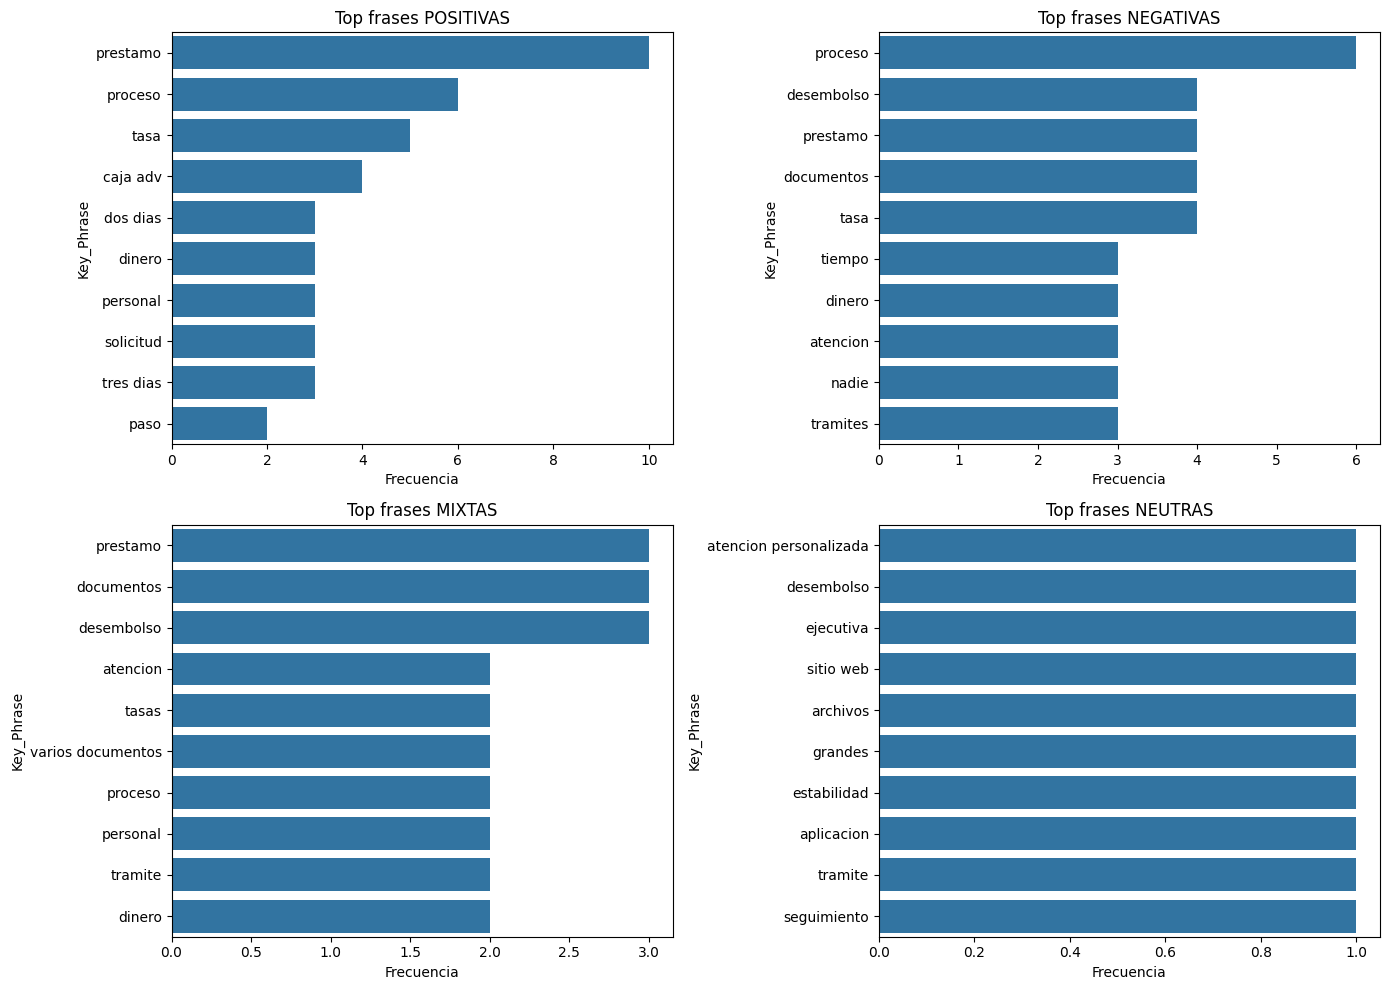

,Key_Phrase,Frecuencia
0,prestamo,10
1,proceso,6
2,tasa,5
3,caja adv,4
4,dos dias,3
5,dinero,3
6,personal,3
7,solicitud,3
8,tres dias,3
9,paso,2


,Key_Phrase,Frecuencia
0,proceso,6
1,desembolso,4
2,prestamo,4
3,documentos,4
4,tasa,4
5,tiempo,3
6,dinero,3
7,atencion,3
8,nadie,3
9,tramites,3


,Key_Phrase,Frecuencia
0,prestamo,3
1,documentos,3
2,desembolso,3
3,atencion,2
4,tasas,2
5,varios documentos,2
6,proceso,2
7,personal,2
8,tramite,2
9,dinero,2


,Key_Phrase,Frecuencia
0,atencion personalizada,1
1,desembolso,1
2,ejecutiva,1
3,sitio web,1
4,archivos,1
5,grandes,1
6,estabilidad,1
7,aplicacion,1
8,tramite,1
9,seguimiento,1


In [25]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def top_kp_por_sent(sent, k=10):
    subset = df[df["Sentimiento"].str.lower() == sent]["Key_Phrases_norm"].str.split(", ").dropna()
    todas = [w for lst in subset for w in lst if w]
    top = Counter(todas).most_common(k)
    return pd.DataFrame(top, columns=["Key_Phrase", "Frecuencia"])

# Generar para todos los sentimientos
top_pos = top_kp_por_sent("positive", 10)
top_neg = top_kp_por_sent("negative", 10)
top_mix = top_kp_por_sent("mixed", 10)
top_neu = top_kp_por_sent("neutral", 10)

# Graficar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(y="Key_Phrase", x="Frecuencia", data=top_pos, ax=axes[0,0])
axes[0,0].set_title("Top frases POSITIVAS")

sns.barplot(y="Key_Phrase", x="Frecuencia", data=top_neg, ax=axes[0,1])
axes[0,1].set_title("Top frases NEGATIVAS")

sns.barplot(y="Key_Phrase", x="Frecuencia", data=top_mix, ax=axes[1,0])
axes[1,0].set_title("Top frases MIXTAS")

sns.barplot(y="Key_Phrase", x="Frecuencia", data=top_neu, ax=axes[1,1])
axes[1,1].set_title("Top frases NEUTRAS")

plt.tight_layout()
plt.show()

# Mostrar tablas
display(top_pos)
display(top_neg)
display(top_mix)
display(top_neu)


OBSERVACIONES:

- Frases Positivas: Los clientes valoran principalmente la rapidez en los préstamos y la eficiencia del proceso, mencionando con frecuencia palabras como préstamo, proceso y tasa, lo que refleja satisfacción con la agilidad del servicio.

- Frases Negativas: Las quejas se centran en el proceso y desembolso, junto con temas de documentos y tiempo, lo que evidencia demoras o trámites engorrosos que afectan la experiencia.

- Frases Mixtas: Predominan términos como préstamo, documentos y desembolso, mostrando que algunos clientes reconocen aspectos positivos pero también inconvenientes parciales durante la gestión.

- Frases Neutras: Se mencionan expresiones más descriptivas como atención personalizada, ejecutiva y sitio web, lo que sugiere comentarios informativos o sin carga emocional, más orientados a detallar la experiencia que a valorarla.

Entidades clave (Organizaciones, Ubicaciones, Tipos de persona) – radar rápido

In [27]:
import re
import pandas as pd
import matplotlib.pyplot as plt

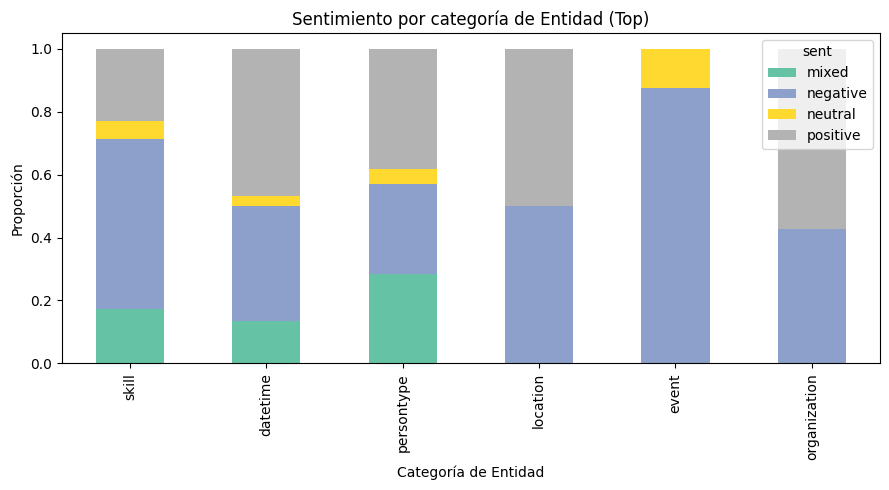

sent,mixed,negative,neutral,positive
categoria,,,,
skill,6,19,2,8
datetime,4,11,1,14
persontype,6,6,1,8
location,0,6,0,6
event,0,7,1,0
organization,0,3,0,4


In [28]:
def split_entities(s):
    s = str(s) if pd.notna(s) else ""
    pairs = re.findall(r"([^,]+?)\s*\(([^)]+)\)", s)
    return pairs

rows = []
for _, r in df.iterrows():
    for text, cat in split_entities(r["Entities"]):
        rows.append((text.strip().lower(), cat.strip().lower(), r["Sentimiento"]))

ents = pd.DataFrame(rows, columns=["entidad", "categoria", "sent"])

cat_pivot = pd.crosstab(ents["categoria"], ents["sent"])
cat_pivot = cat_pivot.loc[cat_pivot.sum(axis=1).sort_values(ascending=False).head(6).index]

cat_prop = cat_pivot.div(cat_pivot.sum(axis=1), axis=0)
cat_prop.plot(kind="bar", stacked=True, figsize=(9,5), cmap="Set2")

plt.title("Sentimiento por categoría de Entidad (Top)")
plt.ylabel("Proporción")
plt.xlabel("Categoría de Entidad")
plt.tight_layout()
plt.show()

display(cat_pivot)


OBSERVACIONES:

- La categoría “datetime” (referida a tiempos o plazos) concentra la mayor cantidad de sentimientos positivos (14), lo que indica que los clientes valoran los procesos rápidos o los tiempos de respuesta cortos.

- En contraste, “skill” y “event” muestran un predominio de opiniones negativas, sugiriendo insatisfacción con la atención o la experiencia en eventos y gestión del servicio.

- Las menciones a “organization” tienen una proporción equilibrada, con algunos comentarios positivos, lo que refleja confianza moderada hacia la institución, pero aún con oportunidades de mejora en la comunicación y eficiencia.

Resumen ejecutivo exportable (KPIs y tabla final)

In [30]:
import numpy as np
import pandas as pd

kpis = {
    "total_resenas": len(df),
    "pct_positivo": (df["Sentimiento"] == "positive").mean(),
    "pct_negativo": (df["Sentimiento"] == "negative").mean(),
    "pct_mixto": (df["Sentimiento"] == "mixed").mean(),
    "pct_neutro": (df["Sentimiento"] == "neutral").mean(),
    "tiempo_medio_dias": float(np.nanmean(df["tiempo_dias"])) if "tiempo_dias" in df else np.nan,
    "frase_mas_repetida": df["Key_Phrases_norm"].mode()[0] if not df["Key_Phrases_norm"].empty else "",
}

kpis["balance_sentimiento"] = (kpis["pct_positivo"] - kpis["pct_negativo"]) * 100

if "Entities_norm" in df:
    entidades = df["Entities_norm"].str.split(",").explode().str.strip()
    top_entidades = entidades.value_counts().head(3).index.tolist()
    kpis["top_entidades"] = ", ".join(top_entidades)

kpis_df = pd.DataFrame([kpis])
kpis_df = kpis_df.round(2)

with pd.ExcelWriter("resumen_analitico_ADV.xlsx", engine="openpyxl") as writer:
    kpis_df.to_excel(writer, sheet_name="KPIs", index=False)
    df.to_excel(writer, sheet_name="Detalle", index=False)

print("📊 Resumen exportado con KPIs ampliados a 'resumen_analitico_ADV.xlsx'")
display(kpis_df)


📊 Resumen exportado con KPIs ampliados a 'resumen_analitico_ADV.xlsx'


,total_resenas,pct_positivo,pct_negativo,pct_mixto,pct_neutro,tiempo_medio_dias,frase_mas_repetida,balance_sentimiento,top_entidades
0,80,0.31,0.51,0.14,0.04,8.44,"15 dias, prestamo, experiencia, terrible, moti...",-20.0,", personal persontype, asesor persontype"


CONCLUSIONES FINALES:

1. El 51% de las reseñas son negativas, el 31% positivas, y el 18% restante se reparte entre mixtas y neutras.

2. Los clientes que valoran positivamente su experiencia destacan la rapidez, usando frases como “dos días”, “48 horas” o “ágil”.

3. Las reseñas negativas suelen mencionar tiempos mucho más largos, con promedios de hasta 13 días frente a 1.5 días en las positivas.

4. El tema de los errores es el que más contribuye a la insatisfacción, ya que genera retrasos y confusión durante el proceso.

5. Los requisitos excesivos y la falta de comunicación clara también son causas frecuentes de frustración entre los clientes.

6. El trato del personal y la rapidez del servicio son los factores que más ayudan a construir una percepción positiva.

7. Dentro de las categorías analizadas, “datetime” (referencias a tiempos o plazos) se asocia a opiniones positivas, mientras que “skill” y “event” se relacionan más con experiencias negativas.

8. En general, los clientes valoran cuando el proceso es rápido, claro y sin errores. Pero si deben regresar varias veces, entregar documentos repetidos o esperar demasiado, la experiencia se vuelve negativa incluso si al final reciben el préstamo..